In [228]:
import pandas as pd
df=pd.DataFrame()

In [229]:
df=pd.read_csv('sector1.csv', index_col='date',parse_dates=True)

<ipython-input-229-3180effb9680>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('sector1.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

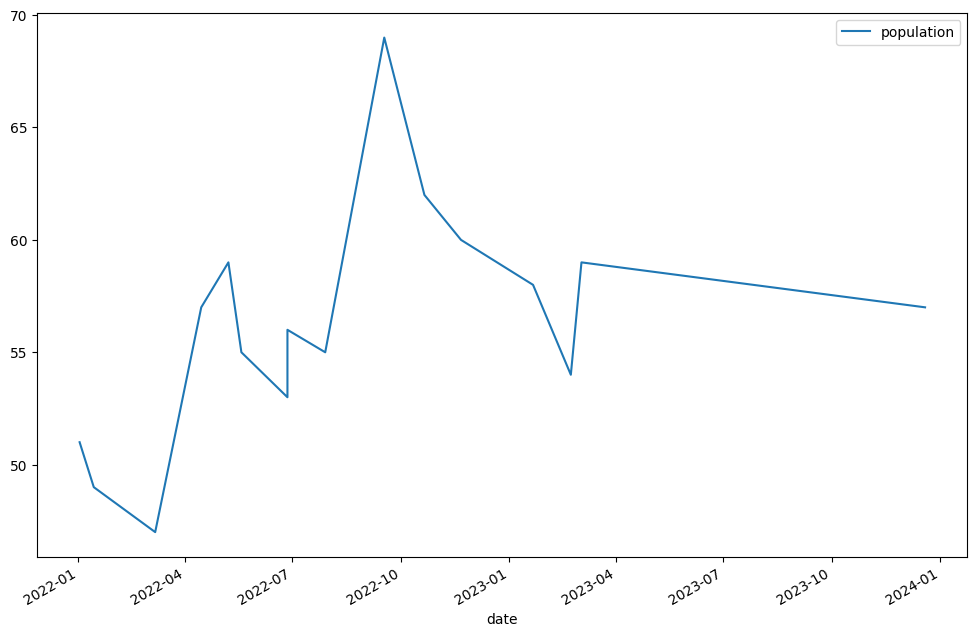

In [230]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [231]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-01-14,49.0,NaN,NaN,NaN
2022-01-02,51.0,49.0,NaN,NaN
2022-04-15,57.0,51.0,49.0,NaN
2022-05-19,55.0,57.0,51.0,49.0
2022-06-27,53.0,55.0,57.0,51.0
2022-06-27,56.0,53.0,55.0,57.0
2022-03-07,47.0,56.0,53.0,55.0
2022-07-29,55.0,47.0,56.0,53.0
2022-05-08,59.0,55.0,47.0,56.0


In [232]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-05-19,55.0,57.0,51.0,49.0
2022-06-27,53.0,55.0,57.0,51.0
2022-06-27,56.0,53.0,55.0,57.0
2022-03-07,47.0,56.0,53.0,55.0
2022-07-29,55.0,47.0,56.0,53.0
2022-05-08,59.0,55.0,47.0,56.0
2022-09-17,69.0,59.0,55.0,47.0
2022-10-21,62.0,69.0,59.0,55.0
2022-11-21,60.0,62.0,69.0,59.0


In [233]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [234]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [235]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[57. 51. 49.]
 [55. 57. 51.]
 [53. 55. 57.]
 [56. 53. 55.]
 [47. 56. 53.]
 [55. 47. 56.]
 [59. 55. 47.]
 [69. 59. 55.]
 [62. 69. 59.]
 [60. 62. 69.]
 [57. 60. 62.]
 [58. 57. 60.]
 [54. 58. 57.]]


In [236]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(12, 3)
(12, 1)


In [237]:
lin_model.fit(X_train,y_train)

LinearRegression()

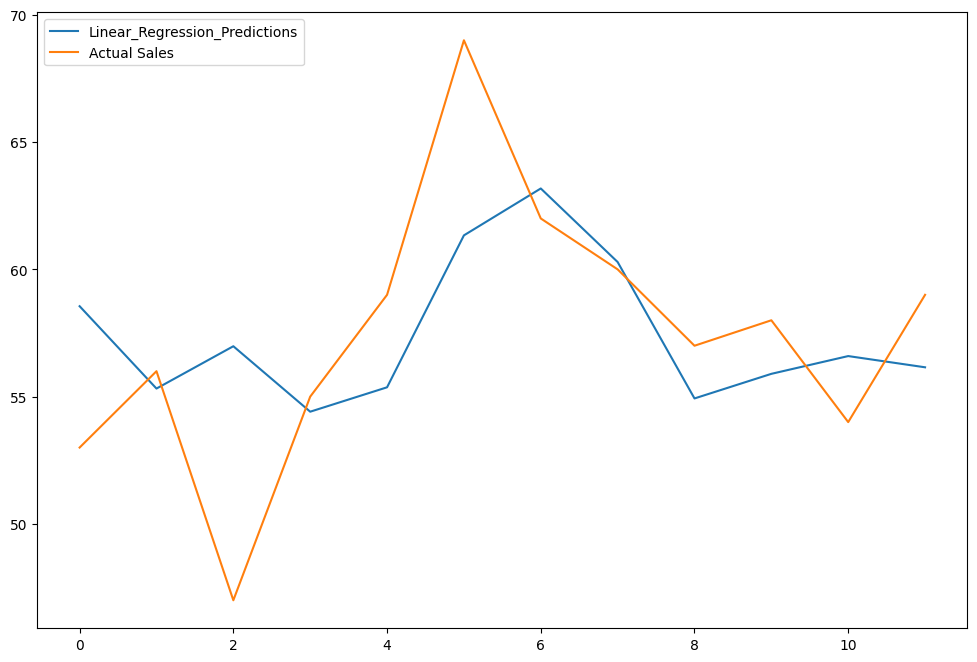

In [238]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [239]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [240]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 4.360857640590017
